In [18]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [19]:
stock_file = '/Users/fanxinwei/Desktop/code/git_repo/dsmp-2024-group20/ARIMA/avg_data.csv'
df = pd.read_csv(stock_file)
df.head(10)

,date,avg_value
0,2025-01-02,280.835195
1,2025-01-03,295.934520
2,2025-01-06,311.477846
3,2025-01-07,356.110860
4,2025-01-08,335.463905
5,2025-01-09,330.244346
6,2025-01-10,313.214255
7,2025-01-13,313.815349
8,2025-01-14,335.924303
9,2025-01-15,322.712487


In [20]:
df.shape

(125, 2)

In [21]:
# 将日期列转换为Datetime类型并设置为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 这里的数据已经按照天为单位给出，不需要重新采样
price = df

In [22]:
price

,avg_value
date,
2025-01-02,280.835195
2025-01-03,295.934520
2025-01-06,311.477846
2025-01-07,356.110860
2025-01-08,335.463905
...,...
2025-06-25,107.480976
2025-06-26,108.170500
2025-06-27,107.474608


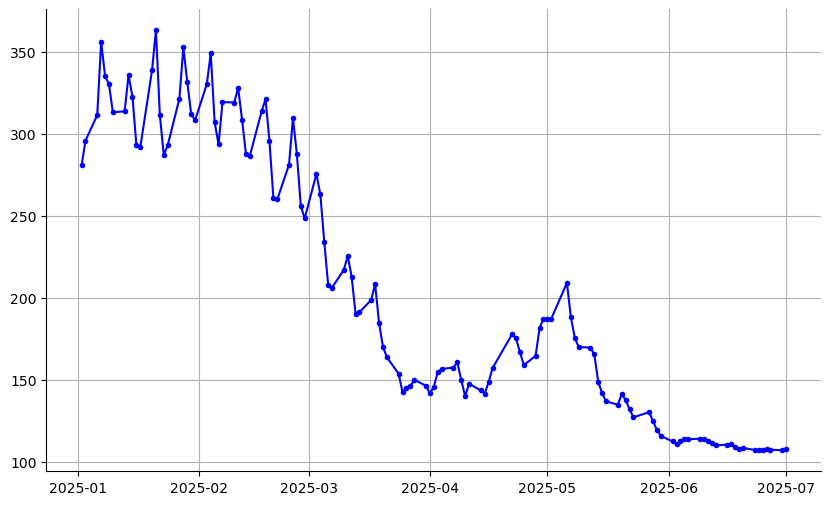

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(price, marker='.', linestyle='-', color='b')
plt.grid(True)
sns.despine()

In [43]:
train_data = price[:-15]
test_data = price[-15:]
train_data_diff = train_data.diff(1)
train_data_diff = train_data_diff.dropna()


In [44]:
from statsmodels.tsa.stattools import adfuller
# ADF test (ADF(Augmented Dickey-Fuller) 强迪基-福勒检验)
def ADFtest(timeseries):
    # 执行Augmented Dickey-Fuller测试
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
ADFtest(train_data_diff)

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -2.069692
p-value                         0.256875
#Lags Used                      9.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [48]:
# cross validation
## using auto_arima to find the best ARIMA model
import pmdarima as pm
## 自动寻找最佳ARIMA模型

### remember to check y is base on with training data: train_avg ? or train_wavg?
auto_model = pm.auto_arima( train_data, start_p=0, start_q=0,
                            test='adf',
                            max_p=10, max_q=10,
                            seasonal=False,   ## if seasonal=True, need to add "start_P = " and "D="
                            # although "False" is been choosen, must set the "m="( but "m=" does't work)
                            suppress_warnings= 'True',
                            information_criterion= 'aic', ## using aic to choose the best model
                            error_action='ignore',
                            stepwise= False,    ## “True”(default) may cannot find the best way, but "False" will waste more time.
                            trace= True   ## print the detail of the searching process
                            )
auto_model.fit

print(auto_model.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=928.089, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=917.085, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=903.321, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=899.346, Time=0.02 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=900.665, Time=0.04 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=884.579, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=926.435, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=916.913, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=902.994, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=901.340, Time=0.04 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=895.614, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=886.678, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=881.079, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=861.524, Time=0.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=863.522, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] i

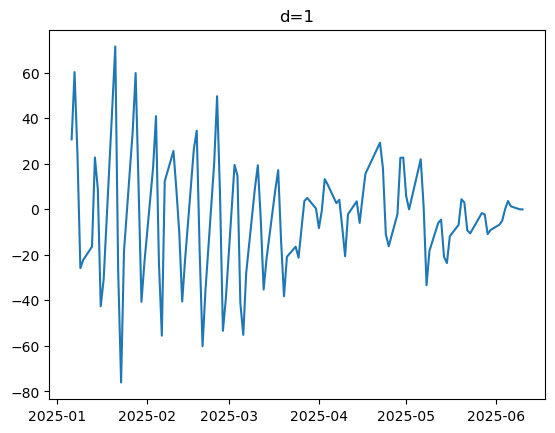

In [39]:
plt.figure()
plt.plot(train_data_diff)
plt.title('d=1')
plt.show()

/var/folders/90/3xy67qxj76v0lkc50q__s4t80000gn/T/ipykernel_99738/1405697161.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


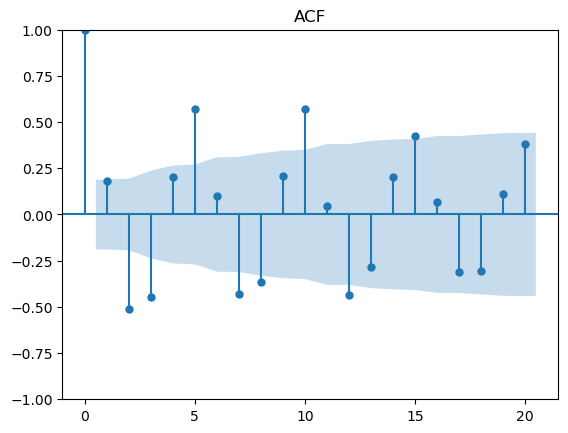

In [26]:
acf = plot_acf(train_data_diff, lags=20)
plt.title("ACF")
acf.show()

/var/folders/90/3xy67qxj76v0lkc50q__s4t80000gn/T/ipykernel_99738/1886431722.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


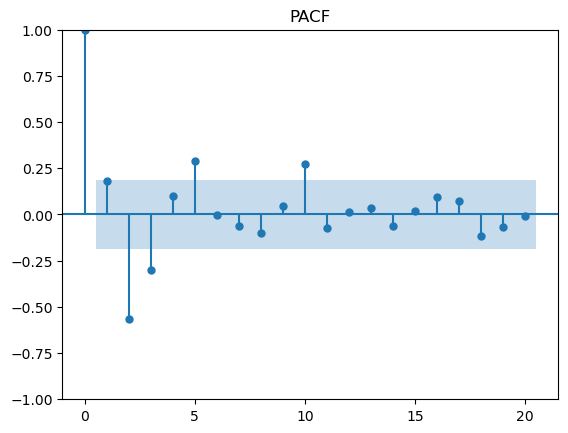

In [27]:
pacf = plot_pacf(train_data_diff, lags=20)
plt.title("PACF")
pacf.show()

In [49]:
model = ARIMA(train_data, order=(2, 1, 2))

/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
results = model.fit()

In [51]:
forecast = results.forecast(steps=15)

/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [52]:
forecast_df = pd.DataFrame(forecast.values, index=test_data.index)

In [32]:
forecast_df

,0
date,
2025-06-11,116.161023
2025-06-12,115.057046
2025-06-13,114.424823
2025-06-16,112.478270
2025-06-17,114.138029
2025-06-18,114.667184
2025-06-19,115.393968
2025-06-20,113.218074
2025-06-23,113.048246


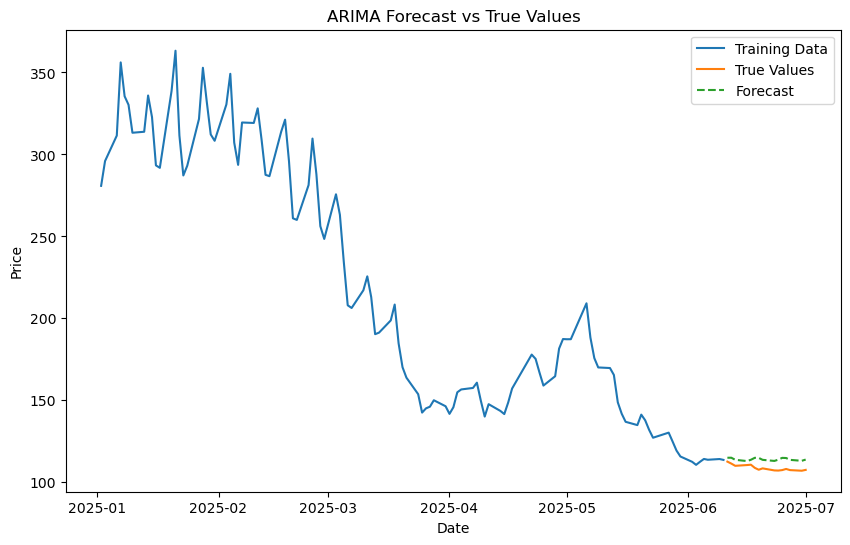

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='True Values')
plt.plot(forecast_df, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs True Values')
plt.legend()
plt.show()